# WeatherPy
----


## Analysis
    
Temperature seems to have a clear correlation with latitude. However there is no strong relationship between latitude humidity, cloudiness or wind speed. Wind speed tends to generally be betweeen 0 and 25 mph regardless of latitude. As expected, the weather becomes significantly warmer as approaches the equator. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import csv


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
check_url = f"{url}{api_key}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
max_temp_f = []
humid = []
cloud = []
wind_mph = []
country = []
date = []
lat = []
long = []
name = []

count = 0

for city in cities:
    try:
        response = requests.get(check_url + city).json()
        count +=1
        max_temp_f.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response ['clouds']['all'])
        wind_mph.append(response ['wind']['speed'])
        country.append(response ['sys']['country'])
        date.append(response ['dt'])
        lat.append(response ['coord']['lat'])
        long.append(response ['coord']['lon'])
        name.append(response['name'])


        print(f"Processing Record {count} | {city}")
    except KeyError:
        print("City not found. Skipping...")

Processing Record 1 | new norfolk
Processing Record 2 | constitucion
Processing Record 3 | albany
Processing Record 4 | rikitea
Processing Record 5 | puerto ayora
Processing Record 6 | norman wells
Processing Record 7 | bonavista
Processing Record 8 | inyonga
City not found. Skipping...
Processing Record 10 | coquimbo
City not found. Skipping...
Processing Record 12 | klaksvik
Processing Record 13 | ushuaia
Processing Record 14 | talnakh
City not found. Skipping...
Processing Record 16 | torbay
Processing Record 17 | victoria
Processing Record 18 | zemetchino
City not found. Skipping...
Processing Record 20 | bud
Processing Record 21 | yellowknife
Processing Record 22 | busselton
Processing Record 23 | bethel
Processing Record 24 | ribeira grande
Processing Record 25 | provideniya
City not found. Skipping...
Processing Record 27 | chokurdakh
Processing Record 28 | mataura
Processing Record 29 | punta arenas
Processing Record 30 | kapaa
Processing Record 31 | salinopolis
Processing Reco

Processing Record 255 | washington
City not found. Skipping...
Processing Record 257 | hovd
Processing Record 258 | awbari
City not found. Skipping...
Processing Record 260 | havre-saint-pierre
City not found. Skipping...
Processing Record 262 | touros
Processing Record 263 | east london
Processing Record 264 | iquitos
Processing Record 265 | heihe
Processing Record 266 | verkhnevilyuysk
Processing Record 267 | san juan evangelista
Processing Record 268 | port hedland
Processing Record 269 | ajaccio
Processing Record 270 | trat
Processing Record 271 | codrington
Processing Record 272 | arkhangelsk
Processing Record 273 | mantua
Processing Record 274 | iguape
City not found. Skipping...
Processing Record 276 | guerrero negro
Processing Record 277 | port-gentil
Processing Record 278 | hereford
Processing Record 279 | port lincoln
Processing Record 280 | lodja
Processing Record 281 | neuquen
Processing Record 282 | betsiamites
Processing Record 283 | pangnirtung
Processing Record 284 | ol

City not found. Skipping...
Processing Record 503 | batemans bay
Processing Record 504 | den helder
Processing Record 505 | cogoleto
City not found. Skipping...
Processing Record 507 | eydhafushi
Processing Record 508 | ust-barguzin
City not found. Skipping...
Processing Record 510 | liptovsky hradok
Processing Record 511 | fortuna
Processing Record 512 | varzea da palma
Processing Record 513 | oda
Processing Record 514 | kirakira
Processing Record 515 | erzin
Processing Record 516 | yining
Processing Record 517 | barcelona
Processing Record 518 | kununurra
Processing Record 519 | kholm
Processing Record 520 | tazovskiy
Processing Record 521 | koutiala
City not found. Skipping...
Processing Record 523 | lebu
Processing Record 524 | zalari
Processing Record 525 | tahe
Processing Record 526 | mandalgovi
Processing Record 527 | vorokhta
City not found. Skipping...
Processing Record 529 | altay
City not found. Skipping...
Processing Record 531 | tabas
Processing Record 532 | ahuimanu
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp_f,
    "Wind Speed": wind_mph
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Norfolk,90,AU,1570733870,70,-42.78,147.06,48.20,5.82
1,Constitucion,20,MX,1570733871,33,23.99,-104.67,78.01,1.03
2,Albany,20,US,1570733872,37,42.65,-73.75,70.00,8.05
3,Rikitea,82,PF,1570733872,71,-23.12,-134.97,68.68,11.07
4,Puerto Ayora,33,EC,1570733873,57,-0.74,-90.35,75.20,21.92


In [16]:
# Save Data to csv

weather_df.to_csv("../output_data/weather.csv", encoding="utf-8", index=False)

In [17]:
weather_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

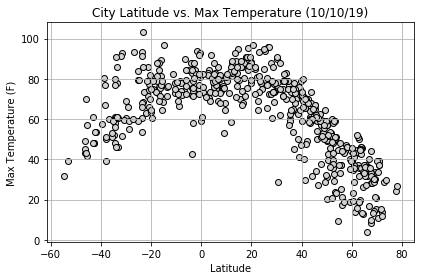

In [21]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, max_temp_f, marker="o", facecolors="lightgrey", edgecolors="black")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Max Temperature (10/10/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()

#save figure
plt.savefig("../Images/Lat vs Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

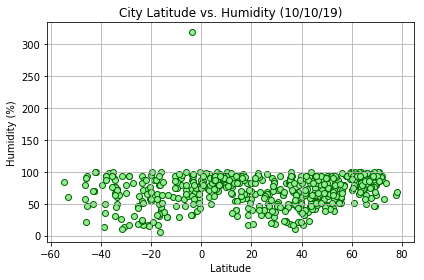

In [27]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, humid, marker="o", facecolors="lightgreen", edgecolors="darkgreen")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Humidity (10/10/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# save figure
plt.savefig("../Images/Lat vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

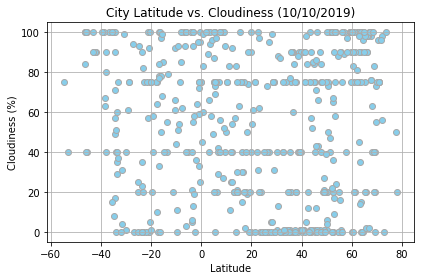

In [30]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, cloud, marker="o", facecolors="skyblue", edgecolors="darkgrey")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Cloudiness (10/10/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
# plt.xlim(min(lat)-5,max(lat)+5)
# plt.ylim(min(wind_mph)-5,wind_mph+5)

# save figure
plt.savefig("../Images/Lat vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

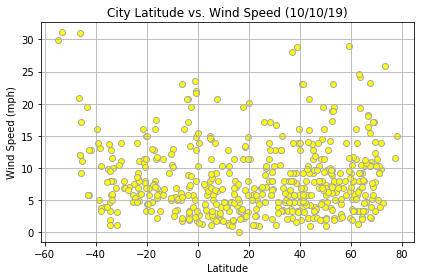

In [33]:

# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, wind_mph, marker="o", facecolors="yellow", edgecolors="darkgrey")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Wind Speed (10/10/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
# plt.xlim(min(lat)-5,max(lat)+5)
# plt.ylim(min(wind_mph)-5,wind_mph+5)

# save figure
plt.savefig("../Images/Lat vs WindSpeed.png")
plt.show()